Loading dataset

In [520]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import matplotlib.pyplot as pl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import re
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')
gender=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Preprocessing the data**
* checking the nature of the data
* viewing the first 8 rows of the train data
* Handling the null value in the age,embarked and the cabin columns using a function handle_null
* Checking for duplicates
* Feature Engineering->Extracting the name column to names only and tickets to numeric only.
* Encoding Categorical Data.


In [521]:
print(train.info())
train.head(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [522]:
#checking null value
print(train.isnull().sum())
print(test.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


**Preprocessing the data**# 
Handling the null values

In [523]:
def handle_null(train,test):
    '''
    cleans data by replacing the null values
    in  Age it replaces the null with  median
    in Cabin it replaces the null with unknown
    in Embarked it replaces the null with mode
    '''
    #converting age to numeric
    train['Age']=pd.to_numeric(train['Age'],errors='coerce')
    test['Age']=pd.to_numeric(test['Age'],errors='coerce')
    #Handling null value using the median
    train['Age'].fillna(train['Age'].median() ,inplace=True)
    test['Age'].fillna(test['Age'].median() ,inplace=True)
    #Replacing the null value on the cabin column with unknown
    train['Cabin'].fillna("unknown",inplace=True)
    test['Cabin'].fillna("unknown",inplace=True)
    #Replacing null value on embarked column using the mode
    train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
    test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
    #replacing null value onthe fare column
    test['Fare'].fillna(test['Fare'].median(),inplace=True)
   
    
    return train,test
    
train,test=handle_null(train,test)

train


<ipython-input-523-9fc59d9d8d85>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median() ,inplace=True)
<ipython-input-523-9fc59d9d8d85>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [524]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [525]:
#checking for duplicates
dups=train.duplicated().sum()
if dups>0:
    print('Duplicate available')

else:
    print('No duplicates')


No duplicates


In [526]:
#Feature Engineering.

#load the spacy English

nlp= spacy.load('en_core_web_sm')

def preprocess_name(name):
    #convert to lower case
    name=name.lower()
    #remove titles
    name= re.sub(r'(mr\.|mrs\.|miss|dr\.|master)','',name).strip()
    #apply spacy NLP processing
    doc=nlp(name)
    #extract the name only
    Extracted_name = " ".join([token.lemma_ for token in doc if token.ent_type_ == "PERSON" or token.is_alpha])
   
    
    return Extracted_name

def preprocess_ticket(ticket):
    ticket_str=str(ticket)
    #exacting the numeric value of ticket
    Ticket_new =''.join(filter(str.isdigit,ticket_str))
    
    return Ticket_new



#apply the preprocessing function

train['Extracted_name']=train['Name'].apply(preprocess_name)
test['Extracted_name']=test['Name'].apply(preprocess_name)
train['Ticket_new']=train['Ticket'].apply(preprocess_ticket)
test['Ticket_new']=test['Ticket'].apply(preprocess_ticket)
#dropping the Name and Ticket column
train.drop(['Name'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)
test.drop(['Ticket'],axis=1,inplace=True)
#printing the train data
train
    

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Extracted_name,Ticket_new
0,1,0,3,male,22.0,1,0,7.2500,unknown,S,braund owen harris,521171
1,2,1,1,female,38.0,1,0,71.2833,C85,C,cuming john bradley florence briggs thayer,17599
2,3,1,3,female,26.0,0,0,7.9250,unknown,S,heikkinen laina,23101282
3,4,1,1,female,35.0,1,0,53.1000,C123,S,futrelle jacque heath lily may peel,113803
4,5,0,3,male,35.0,0,0,8.0500,unknown,S,allen william henry,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,unknown,S,montvila rev juozas,211536
887,888,1,1,female,19.0,0,0,30.0000,B42,S,graham margaret edith,112053
888,889,0,3,female,28.0,1,2,23.4500,unknown,S,johnston catherine helen carrie,6607
889,890,1,1,male,26.0,0,0,30.0000,C148,C,behr karl howell,111369


In [527]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Extracted_name,Ticket_new
0,892,3,male,34.5,0,0,7.8292,unknown,Q,kelly jam,330911
1,893,3,female,47.0,1,0,7.0000,unknown,S,wilke james ellen need,363272
2,894,2,male,62.0,0,0,9.6875,unknown,Q,myle thomas francis,240276
3,895,3,male,27.0,0,0,8.6625,unknown,S,wirz albert,315154
4,896,3,female,22.0,1,1,12.2875,unknown,S,hirvonen alexander helga e lindqvist,3101298
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,unknown,S,spector woolf,53236
414,1306,1,female,39.0,0,0,108.9000,C105,C,oliva y ocana dona fermina,17758
415,1307,3,male,38.5,0,0,7.2500,unknown,S,saether simon sivertsen,3101262
416,1308,3,male,27.0,0,0,8.0500,unknown,S,ware frederick,359309


In [528]:
#Encoding the categorical features

def label_encode(train, test, categorical_label):
    # Initialize  LabelEncoder
    le = LabelEncoder()
    # Encode categorical label 
    for x in categorical_label:
        train[x]=train[x].astype(str)
        test[x]=test[x].astype(str)
        #apply label encoder
        train[x]=le.fit_transform(train[x])
        test[x]=le.fit_transform(test[x])

    return train, test


# Assuming train and test DataFrames exist

categorical_label = ['Sex','Embarked','Extracted_name','Cabin']

train_encoded, test_encoded = label_encode(train, test, categorical_label)
train_encoded

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Extracted_name,Ticket_new
0,1,0,3,1,22.0,1,0,7.2500,147,2,108,521171
1,2,1,1,0,38.0,1,0,71.2833,81,0,191,17599
2,3,1,3,0,26.0,0,0,7.9250,147,2,360,23101282
3,4,1,1,0,35.0,1,0,53.1000,55,2,278,113803
4,5,0,3,1,35.0,0,0,8.0500,147,2,15,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,147,2,556,211536
887,888,1,1,0,19.0,0,0,30.0000,30,2,310,112053
888,889,0,3,0,28.0,1,2,23.4500,147,2,421,6607
889,890,1,1,1,26.0,0,0,30.0000,60,0,81,111369


In [529]:
#imports
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset,DataLoader


print (torch.__version__)
print(torch.cuda.is_available())

2.5.1+cu121
False


In [530]:
#selecting the feature and target column
X=train_encoded.iloc[:,[0] + list(range(2,11))]
print(X)
y=train_encoded.iloc[:,[1]]
print(y)

     PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Cabin  Embarked  \
0              1       3    1  22.0      1      0   7.2500    147         2   
1              2       1    0  38.0      1      0  71.2833     81         0   
2              3       3    0  26.0      0      0   7.9250    147         2   
3              4       1    0  35.0      1      0  53.1000     55         2   
4              5       3    1  35.0      0      0   8.0500    147         2   
..           ...     ...  ...   ...    ...    ...      ...    ...       ...   
886          887       2    1  27.0      0      0  13.0000    147         2   
887          888       1    0  19.0      0      0  30.0000     30         2   
888          889       3    0  28.0      1      2  23.4500    147         2   
889          890       1    1  26.0      0      0  30.0000     60         0   
890          891       3    1  32.0      0      0   7.7500    147         1   

     Extracted_name  
0               108  
1      

In [531]:
#spilting train and validation data
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=5)
#converting to PyTorch Tensors
X_train_tens=torch.FloatTensor(X_train.values)
X_valid_tens=torch.FloatTensor(X_valid.values)
y_train_tens=torch.FloatTensor(y_train.values)
y_valid_tens=torch.FloatTensor(y_valid.values)


In [532]:
#create datasets and dataloaders
train_dataset=TensorDataset(X_train_tens,y_train_tens)
val_dataset=TensorDataset(X_valid_tens,y_valid_tens)

train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True)
val_dataloader=DataLoader(val_dataset,batch_size=32)


In [533]:
#define Neural Network 
class TitanicNN(nn.Module):
    def __init__(self,input_size):
        super(TitanicNN,self).__init__()
        self.fc1=nn.Linear(input_size,64)
        self.fc2=nn.Linear(64,32) 
        self.fc3=nn.Linear(32,2)#2 results either 1 survived or o not survived
        self.dropout=nn.Dropout(0.2)
        self.relu=nn.ReLU()
    def forward(self,x):
        x=self.relu(self.fc1(x))
        x=self.dropout(x)
        x=self.relu(self.fc2(x))
        x=self.dropout(x)
        x=self.fc3(x)
        return x
#intialize the model
input_size=X_train.shape[1]
model=TitanicNN(input_size)
print(model)
 

TitanicNN(
  (fc1): Linear(in_features=10, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (relu): ReLU()
)


In [534]:
#define loss function and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(), lr=0.001)

In [548]:

from tqdm import tqdm  # Progress bar for better visualization

def train_model(model, train_dataloader, val_dataloader, criterion, optimizer, epochs=50):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)  # Move model to GPU if available
    
    best_accuracy=0.0
    train_losses = []
    val_losses = []
    val_accuracies = []
    # Create directory if it doesn't exist
    #os.makedirs('/kaggle/working/titanic', exist_ok=True)
    checkpoint_pth='/kaggle/working/titanic.pth'

    for epoch in range(epochs):
        # Training
        model.train()#sets the model to training mode
        running_loss = 0.0

        for batch_idx, (inputs, labels) in enumerate(tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}")):
            inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU/CPU where the model is

            optimizer.zero_grad()#clears previous gradient
            outputs = model(inputs)#forward pass: computes model predictions

            # Debugging Print Statements
            print(f"Batch {batch_idx}: outputs shape: {outputs.shape}, labels shape: {labels.shape}")

            labels = labels.squeeze().long() #.squeeze remove unnecessary dimensions # Convert to interger for classification
            loss = criterion(outputs, labels)#computes loss between predictions and ground truth
            loss.backward()#backward pass: computes gradients
            optimizer.step()#updates model parameters
            running_loss += loss.item()#accumulates batch loss

        train_loss = running_loss / len(train_dataloader)#computes the train loss for epoch
        train_losses.append(train_loss)#store epoch training loss

        # Validation
        model.eval()#set the model to evaluation model
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():#Disables gradient calculation
            for batch_idx, (inputs, labels) in enumerate(val_dataloader):
                inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU/CPU
                labels = labels.squeeze().long()

                outputs = model(inputs)#forward pass
                
                print(f"Validation Batch {batch_idx}: outputs shape: {outputs.shape}, labels shape: {labels.shape}")

                loss = criterion(outputs, labels)#Computes validation loss
                val_loss += loss.item()#accumulates the validation loss

                _, predicted = torch.max(outputs.data, 1)#Gets predicted class indices (argmax of outputs)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_loss /= len(val_dataloader)  # Compute average validation loss
        val_losses.append(val_loss)#store epoch validation  loss

        val_accuracy = correct / total if total > 0 else 0  # Compute validation accuracy
        val_accuracies.append(val_accuracy)#store epoch validation accuracies
        

        # Print training progress
        print(f'Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')
        if val_accuracy>best_accuracy:
           print(f"Validation accuracy improved from{val_accuracy:.4f}to{best_accuracy:.4f}")
           best_accuracy = val_accuracy
            
           #Save the best model state
           torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_accuracy': best_accuracy,
                'train_loss': train_loss,
                'val_loss': val_loss,
            }, checkpoint_pth)

    return train_losses, val_losses, val_accuracies

# Train the model
train_losses, val_losses, val_accuracies = train_model(
    model, train_dataloader, val_dataloader, criterion, optimizer,epochs=98
)
torch.save(model,'titanic.pth')

Epoch 1/98: 100%|██████████| 23/23 [00:00<00:00, 433.99it/s]


Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 2/98: 100%|██████████| 23/23 [00:00<00:00, 452.48it/s]


Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 3/98: 100%|██████████| 23/23 [00:00<00:00, 440.88it/s]


Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 4/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])


Epoch 4/98: 100%|██████████| 23/23 [00:00<00:00, 408.62it/s]


Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 13: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 14: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 15: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 16: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 17: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 18: outputs shape: torch.Size([32, 2])

Epoch 5/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])


Epoch 5/98: 100%|██████████| 23/23 [00:00<00:00, 410.31it/s]


Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 13: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 14: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 15: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 16: outputs shape: torch.Size([32, 2]), 

Epoch 6/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])


Epoch 6/98: 100%|██████████| 23/23 [00:00<00:00, 424.37it/s]


Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 13: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 14: outputs shape: torch.Size([32, 2]), la

Epoch 7/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])


Epoch 7/98: 100%|██████████| 23/23 [00:00<00:00, 433.04it/s]


Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 13: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 14: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 15: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 16: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 17: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 18: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2

Epoch 8/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])


Epoch 8/98: 100%|██████████| 23/23 [00:00<00:00, 444.81it/s]


Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 13: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 14: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 15: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 16: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 17: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 18: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2

Epoch 9/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])


Epoch 9/98: 100%|██████████| 23/23 [00:00<00:00, 434.72it/s]


Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 13: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 14: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 15: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 16: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 17: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 18: outputs shape: torch.Size([32, 2])

Epoch 10/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])


Epoch 10/98: 100%|██████████| 23/23 [00:00<00:00, 420.71it/s]


Batch 12: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 13: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 14: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 15: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 16: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 17: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 18: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: 

Epoch 11/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])


Epoch 11/98: 100%|██████████| 23/23 [00:00<00:00, 398.48it/s]


Batch 12: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 13: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 14: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 15: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 16: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 17: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 18: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: 

Epoch 12/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])


Epoch 12/98: 100%|██████████| 23/23 [00:00<00:00, 398.62it/s]


Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 13: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 14: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 15: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 16: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 17: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 18: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 19: outputs shape: torch.Size([32, 2]

Epoch 13/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 13/98: 100%|██████████| 23/23 [00:00<00:00, 362.57it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])


Epoch 13/98 - Train Loss: 0.3457, Val Loss: 0.5031, Val Acc: 0.7765


Epoch 14/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 14/98: 100%|██████████| 23/23 [00:00<00:00, 381.28it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 14/98 - Train Loss: 0.3193, Val Loss: 0.5575, Val Acc: 0.7765


Epoch 15/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 15/98: 100%|██████████| 23/23 [00:00<00:00, 396.51it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 15/98 - Train Loss: 0.3192, Val Loss: 0.5153, Val Acc: 0.7877


Epoch 16/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 16/98: 100%|██████████| 23/23 [00:00<00:00, 410.46it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 16/98 - Train Loss: 0.3668, Val Loss: 0.5241, Val Acc: 0.8045


Epoch 17/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 17/98: 100%|██████████| 23/23 [00:00<00:00, 393.59it/s]


Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 17/98 - Train Loss: 0.3415, Val Loss: 0.5768, Val Acc: 0.7486


Epoch 18/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 18/98: 100%|██████████| 23/23 [00:00<00:00, 379.85it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 18/98 - Train Loss: 0.3614, Val Loss: 0.5289, Val Acc: 0.7933


Epoch 19/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 19/98: 100%|██████████| 23/23 [00:00<00:00, 355.42it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 19/98 - Train Loss: 0.3264, Val Loss: 0.4960, Val Acc: 0.8156


Epoch 20/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 20/98: 100%|██████████| 23/23 [00:00<00:00, 393.03it/s]


Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 20/98 - Train Loss: 0.3169, Val Loss: 0.5217, Val Acc: 0.8045


Epoch 21/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 21/98: 100%|██████████| 23/23 [00:00<00:00, 428.03it/s]


Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 21/98 - Train Loss: 0.3373, Val Loss: 0.5352, Val Acc: 0.7430


Epoch 22/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 22/98: 100%|██████████| 23/23 [00:00<00:00, 392.68it/s]

Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 22/98 - Train Loss: 0.3553, Val Loss: 0.4947, Val Acc: 0.8045


Epoch 23/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 23/98: 100%|██████████| 23/23 [00:00<00:00, 398.20it/s]


Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 23/98 - Train Loss: 0.3649, Val Loss: 0.4829, Val Acc: 0.7989


Epoch 24/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 24/98: 100%|██████████| 23/23 [00:00<00:00, 369.90it/s]

Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 24/98 - Train Loss: 0.3508, Val Loss: 0.5054, Val Acc: 0.7989


Epoch 25/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 25/98: 100%|██████████| 23/23 [00:00<00:00, 357.99it/s]


Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 25/98 - Train Loss: 0.3164, Val Loss: 0.5309, Val Acc: 0.8101


Epoch 26/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 26/98: 100%|██████████| 23/23 [00:00<00:00, 380.96it/s]


Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 26/98 - Train Loss: 0.3252, Val Loss: 0.5093, Val Acc: 0.8212


Epoch 27/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 27/98: 100%|██████████| 23/23 [00:00<00:00, 365.90it/s]


Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 27/98 - Train Loss: 0.3315, Val Loss: 0.5354, Val Acc: 0.8156


Epoch 28/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 28/98: 100%|██████████| 23/23 [00:00<00:00, 350.66it/s]


Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 28/98 - Train Loss: 0.3470, Val Loss: 0.5071, Val Acc: 0.8156


Epoch 29/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 29/98: 100%|██████████| 23/23 [00:00<00:00, 382.81it/s]

Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 29/98 - Train Loss: 0.3185, Val Loss: 0.4827, Val Acc: 0.8156


Epoch 30/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 30/98: 100%|██████████| 23/23 [00:00<00:00, 393.06it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 30/98 - Train Loss: 0.3184, Val Loss: 0.4888, Val Acc: 0.8045


Epoch 31/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 31/98: 100%|██████████| 23/23 [00:00<00:00, 369.91it/s]

Batch 17: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 18: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 31/98 - Train Loss: 0.3429, Val Loss: 0.4848, Val Acc: 0.8101


Epoch 32/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 32/98: 100%|██████████| 23/23 [00:00<00:00, 374.25it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 32/98 - Train Loss: 0.3128, Val Loss: 0.5031, Val Acc: 0.8101


Epoch 33/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 33/98: 100%|██████████| 23/23 [00:00<00:00, 369.73it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 33/98 - Train Loss: 0.3198, Val Loss: 0.5126, Val Acc: 0.8156


Epoch 34/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 34/98: 100%|██████████| 23/23 [00:00<00:00, 390.63it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 34/98 - Train Loss: 0.3105, Val Loss: 0.4819, Val Acc: 0.8268



Epoch 35/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 35/98: 100%|██████████| 23/23 [00:00<00:00, 426.08it/s]


Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 35/98 - Train Loss: 0.3181, Val Loss: 0.4701, Val Acc: 0.8268


Epoch 36/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 36/98: 100%|██████████| 23/23 [00:00<00:00, 358.12it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 36/98 - Train Loss: 0.3160, Val Loss: 0.4911, Val Acc: 0.8212


Epoch 37/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 37/98: 100%|██████████| 23/23 [00:00<00:00, 359.11it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 37/98 - Train Loss: 0.3242, Val Loss: 0.5093, Val Acc: 0.8212


Epoch 38/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 38/98: 100%|██████████| 23/23 [00:00<00:00, 373.41it/s]

Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 38/98 - Train Loss: 0.3280, Val Loss: 0.5144, Val Acc: 0.8101


Epoch 39/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 39/98: 100%|██████████| 23/23 [00:00<00:00, 295.48it/s]


Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 39/98 - Train Loss: 0.3185, Val Loss: 0.5076, Val Acc: 0.8212


Epoch 40/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 40/98: 100%|██████████| 23/23 [00:00<00:00, 353.04it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 40/98 - Train Loss: 0.3222, Val Loss: 0.4924, Val Acc: 0.8268


Epoch 41/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 41/98: 100%|██████████| 23/23 [00:00<00:00, 345.41it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 41/98 - Train Loss: 0.3141, Val Loss: 0.4967, Val Acc: 0.8045


Epoch 42/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 42/98: 100%|██████████| 23/23 [00:00<00:00, 346.40it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 42/98 - Train Loss: 0.3312, Val Loss: 0.4957, Val Acc: 0.8045


Epoch 43/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 43/98: 100%|██████████| 23/23 [00:00<00:00, 296.81it/s]

Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 43/98 - Train Loss: 0.3247, Val Loss: 0.4860, Val Acc: 0.8101


Epoch 44/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 44/98: 100%|██████████| 23/23 [00:00<00:00, 338.49it/s]


Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 44/98 - Train Loss: 0.3530, Val Loss: 0.4982, Val Acc: 0.7821


Epoch 45/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 45/98: 100%|██████████| 23/23 [00:00<00:00, 299.07it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 45/98 - Train Loss: 0.3491, Val Loss: 0.4949, Val Acc: 0.8101


Epoch 46/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 46/98: 100%|██████████| 23/23 [00:00<00:00, 305.92it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 46/98 - Train Loss: 0.3449, Val Loss: 0.5028, Val Acc: 0.8156


Epoch 47/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 47/98: 100%|██████████| 23/23 [00:00<00:00, 370.41it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 47/98 - Train Loss: 0.3589, Val Loss: 0.5401, Val Acc: 0.7821


Epoch 48/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 48/98: 100%|██████████| 23/23 [00:00<00:00, 379.22it/s]

Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 48/98 - Train Loss: 0.3532, Val Loss: 0.5876, Val Acc: 0.7486


Epoch 49/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 49/98: 100%|██████████| 23/23 [00:00<00:00, 347.16it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 49/98 - Train Loss: 0.3344, Val Loss: 0.5382, Val Acc: 0.7933


Epoch 50/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 50/98: 100%|██████████| 23/23 [00:00<00:00, 301.71it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 50/98 - Train Loss: 0.3194, Val Loss: 0.5168, Val Acc: 0.7877


Epoch 51/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 51/98: 100%|██████████| 23/23 [00:00<00:00, 326.78it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 51/98 - Train Loss: 0.3360, Val Loss: 0.5384, Val Acc: 0.8045


Epoch 52/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 52/98: 100%|██████████| 23/23 [00:00<00:00, 343.25it/s]


Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 52/98 - Train Loss: 0.3056, Val Loss: 0.5392, Val Acc: 0.8045


Epoch 53/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 53/98: 100%|██████████| 23/23 [00:00<00:00, 329.72it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 53/98 - Train Loss: 0.3243, Val Loss: 0.5143, Val Acc: 0.8101


Epoch 54/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 54/98: 100%|██████████| 23/23 [00:00<00:00, 280.81it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 54/98 - Train Loss: 0.3369, Val Loss: 0.5697, Val Acc: 0.8156


Epoch 55/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 55/98: 100%|██████████| 23/23 [00:00<00:00, 353.20it/s]

Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 55/98 - Train Loss: 0.3522, Val Loss: 0.5428, Val Acc: 0.8212


Epoch 56/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 56/98: 100%|██████████| 23/23 [00:00<00:00, 350.84it/s]

Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 56/98 - Train Loss: 0.3364, Val Loss: 0.4717, Val Acc: 0.8212


Epoch 57/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 57/98: 100%|██████████| 23/23 [00:00<00:00, 308.88it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 57/98 - Train Loss: 0.3523, Val Loss: 0.5184, Val Acc: 0.7877


Epoch 58/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 58/98: 100%|██████████| 23/23 [00:00<00:00, 326.65it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])


Epoch 58/98 - Train Loss: 0.3243, Val Loss: 0.4830, Val Acc: 0.8380
Validation accuracy improved from0.8380to0.8324


Epoch 59/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 59/98: 100%|██████████| 23/23 [00:00<00:00, 326.68it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 59/98 - Train Loss: 0.3209, Val Loss: 0.5063, Val Acc: 0.8324


Epoch 60/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 60/98: 100%|██████████| 23/23 [00:00<00:00, 316.50it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 60/98 - Train Loss: 0.3330, Val Loss: 0.5325, Val Acc: 0.8156


Epoch 61/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 61/98: 100%|██████████| 23/23 [00:00<00:00, 391.34it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])


Epoch 61/98 - Train Loss: 0.3364, Val Loss: 0.4966, Val Acc: 0.8156


Epoch 62/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 62/98: 100%|██████████| 23/23 [00:00<00:00, 383.29it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 62/98 - Train Loss: 0.3200, Val Loss: 0.5037, Val Acc: 0.8101


Epoch 63/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 63/98: 100%|██████████| 23/23 [00:00<00:00, 335.02it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 63/98 - Train Loss: 0.3073, Val Loss: 0.5163, Val Acc: 0.8268


Epoch 64/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 64/98: 100%|██████████| 23/23 [00:00<00:00, 376.19it/s]

Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 64/98 - Train Loss: 0.3350, Val Loss: 0.4972, Val Acc: 0.8212


Epoch 65/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 65/98: 100%|██████████| 23/23 [00:00<00:00, 378.61it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 65/98 - Train Loss: 0.3068, Val Loss: 0.4870, Val Acc: 0.8156


Epoch 66/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 66/98: 100%|██████████| 23/23 [00:00<00:00, 353.76it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 66/98 - Train Loss: 0.3496, Val Loss: 0.4730, Val Acc: 0.7989


Epoch 67/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 67/98: 100%|██████████| 23/23 [00:00<00:00, 364.92it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 67/98 - Train Loss: 0.3297, Val Loss: 0.4615, Val Acc: 0.8101


Epoch 68/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 68/98: 100%|██████████| 23/23 [00:00<00:00, 327.72it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 68/98 - Train Loss: 0.3049, Val Loss: 0.4613, Val Acc: 0.8268


Epoch 69/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 69/98: 100%|██████████| 23/23 [00:00<00:00, 377.45it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 69/98 - Train Loss: 0.3301, Val Loss: 0.4992, Val Acc: 0.8101


Epoch 70/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 70/98: 100%|██████████| 23/23 [00:00<00:00, 323.13it/s]

Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 70/98 - Train Loss: 0.3131, Val Loss: 0.5264, Val Acc: 0.7765


Epoch 71/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 71/98: 100%|██████████| 23/23 [00:00<00:00, 252.46it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])


Epoch 71/98 - Train Loss: 0.3184, Val Loss: 0.5066, Val Acc: 0.8156


Epoch 72/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 72/98: 100%|██████████| 23/23 [00:00<00:00, 343.55it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 72/98 - Train Loss: 0.3277, Val Loss: 0.5073, Val Acc: 0.8156


Epoch 73/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 73/98: 100%|██████████| 23/23 [00:00<00:00, 309.15it/s]

Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 73/98 - Train Loss: 0.3551, Val Loss: 0.5114, Val Acc: 0.8212


Epoch 74/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 74/98: 100%|██████████| 23/23 [00:00<00:00, 304.52it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 74/98 - Train Loss: 0.3717, Val Loss: 0.5554, Val Acc: 0.7933


Epoch 75/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 75/98: 100%|██████████| 23/23 [00:00<00:00, 325.50it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 75/98 - Train Loss: 0.3917, Val Loss: 0.5148, Val Acc: 0.8101


Epoch 76/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 76/98: 100%|██████████| 23/23 [00:00<00:00, 318.27it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 76/98 - Train Loss: 0.3476, Val Loss: 0.4879, Val Acc: 0.8045


Epoch 77/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 77/98: 100%|██████████| 23/23 [00:00<00:00, 296.62it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])


Epoch 77/98 - Train Loss: 0.3341, Val Loss: 0.4967, Val Acc: 0.7989


Epoch 78/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 78/98: 100%|██████████| 23/23 [00:00<00:00, 279.07it/s]

Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 78/98 - Train Loss: 0.3262, Val Loss: 0.5283, Val Acc: 0.8101


Epoch 79/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 79/98: 100%|██████████| 23/23 [00:00<00:00, 287.62it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 79/98 - Train Loss: 0.3226, Val Loss: 0.5366, Val Acc: 0.8045


Epoch 80/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 80/98: 100%|██████████| 23/23 [00:00<00:00, 318.81it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 80/98 - Train Loss: 0.3146, Val Loss: 0.5169, Val Acc: 0.8045


Epoch 81/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 81/98: 100%|██████████| 23/23 [00:00<00:00, 369.42it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])


Epoch 81/98 - Train Loss: 0.3343, Val Loss: 0.4834, Val Acc: 0.8268


Epoch 82/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 82/98: 100%|██████████| 23/23 [00:00<00:00, 347.12it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 82/98 - Train Loss: 0.3340, Val Loss: 0.5177, Val Acc: 0.7877


Epoch 83/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 83/98: 100%|██████████| 23/23 [00:00<00:00, 372.95it/s]

Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 83/98 - Train Loss: 0.3289, Val Loss: 0.5349, Val Acc: 0.8045


Epoch 84/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 84/98: 100%|██████████| 23/23 [00:00<00:00, 359.37it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 84/98 - Train Loss: 0.3147, Val Loss: 0.5174, Val Acc: 0.7989


Epoch 85/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 85/98: 100%|██████████| 23/23 [00:00<00:00, 345.30it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 85/98 - Train Loss: 0.3358, Val Loss: 0.4903, Val Acc: 0.8045


Epoch 86/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 86/98: 100%|██████████| 23/23 [00:00<00:00, 343.34it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 86/98 - Train Loss: 0.3068, Val Loss: 0.4986, Val Acc: 0.8045


Epoch 87/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 87/98: 100%|██████████| 23/23 [00:00<00:00, 335.72it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 87/98 - Train Loss: 0.3245, Val Loss: 0.5045, Val Acc: 0.7933


Epoch 88/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 88/98: 100%|██████████| 23/23 [00:00<00:00, 339.01it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 88/98 - Train Loss: 0.3219, Val Loss: 0.5269, Val Acc: 0.7877


Epoch 89/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 89/98: 100%|██████████| 23/23 [00:00<00:00, 355.66it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 89/98 - Train Loss: 0.3445, Val Loss: 0.5430, Val Acc: 0.8045


Epoch 90/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 90/98: 100%|██████████| 23/23 [00:00<00:00, 316.71it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 90/98 - Train Loss: 0.3427, Val Loss: 0.4944, Val Acc: 0.8156


Epoch 91/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 91/98: 100%|██████████| 23/23 [00:00<00:00, 378.24it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 91/98 - Train Loss: 0.3352, Val Loss: 0.5386, Val Acc: 0.7933


Epoch 92/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 92/98: 100%|██████████| 23/23 [00:00<00:00, 336.69it/s]

Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 92/98 - Train Loss: 0.3351, Val Loss: 0.4890, Val Acc: 0.7877


Epoch 93/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 93/98: 100%|██████████| 23/23 [00:00<00:00, 349.39it/s]

Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 93/98 - Train Loss: 0.3393, Val Loss: 0.4856, Val Acc: 0.7989


Epoch 94/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 94/98: 100%|██████████| 23/23 [00:00<00:00, 382.99it/s]

Batch 19: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 20: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 21: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 94/98 - Train Loss: 0.3514, Val Loss: 0.5124, Val Acc: 0.8045


Epoch 95/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 95/98: 100%|██████████| 23/23 [00:00<00:00, 358.27it/s]


Batch 22: outputs shape: torch.Size([8, 2]), labels shape: torch.Size([8, 1])
Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 95/98 - Train Loss: 0.3252, Val Loss: 0.5456, Val Acc: 0.7989


Epoch 96/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 96/98: 100%|██████████| 23/23 [00:00<00:00, 380.78it/s]


Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 96/98 - Train Loss: 0.3301, Val Loss: 0.4944, Val Acc: 0.8045


Epoch 97/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 97/98: 100%|██████████| 23/23 [00:00<00:00, 386.75it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])


Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 97/98 - Train Loss: 0.3185, Val Loss: 0.5110, Val Acc: 0.8156


Epoch 98/98:   0%|          | 0/23 [00:00<?, ?it/s]

Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 5: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 6: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 7: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 8: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 9: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 10: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 11: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32, 1])
Batch 12: outputs shape: torch.Size([32, 2]), labe

Epoch 98/98: 100%|██████████| 23/23 [00:00<00:00, 372.27it/s]

Validation Batch 0: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 1: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 2: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 3: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 4: outputs shape: torch.Size([32, 2]), labels shape: torch.Size([32])
Validation Batch 5: outputs shape: torch.Size([19, 2]), labels shape: torch.Size([19])
Epoch 98/98 - Train Loss: 0.3396, Val Loss: 0.5103, Val Acc: 0.8156


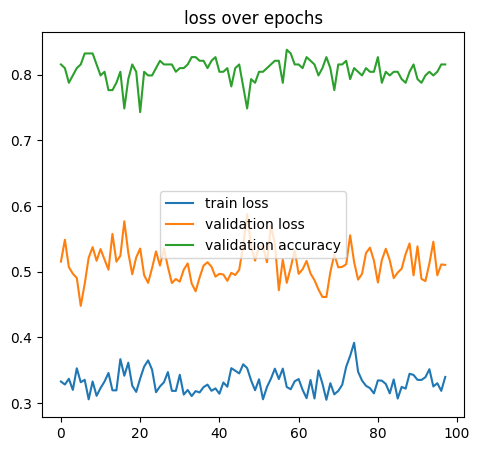

In [549]:
#Evaluate the model
pl.figure(figsize=(12,5))
pl.subplot(1,2,1)
pl.plot(train_losses,label="train loss" )
pl.plot(val_losses,label="validation loss")
pl.legend()
pl.title('loss over epochs')
#plot validation Accuracy
pl.subplot(1,2,1)
pl.plot(val_accuracies,label="validation accuracy")
pl.legend()
pl.show()


In [551]:
# Ensure test_encoded is clean and contains only numeric values (except PassengerId)
passenger_ids = test_encoded['PassengerId']  # Save this before dropping
test_data = test_encoded.drop('PassengerId', axis=1)

# Ensure all data is numeric
test_data = test_data.apply(pd.to_numeric, errors='coerce')
test_data = test_data.fillna(0)  # Optionally use other imputation methods

# Convert to tensor
test_tensor = torch.FloatTensor(test_data.values)

# Make predictions
model.eval()
with torch.no_grad():
    outputs = model(test_tensor)
    _, predictions = torch.max(outputs, 1)

# Create submission file
submission = pd.DataFrame({
    'PassengerId': passenger_ids,  # Use saved values
    'Survived': predictions.numpy()
})

submission.to_csv('/kaggle/working/titanic_submission.csv', index=False)
